In [16]:
!pip install keras.applications

     |████████████████████████████████| 51kB 4.5MB/s 


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.models import Model
from keras.layers.core import Dense, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D
from keras.layers import Input, Dropout
from keras.layers.merge import concatenate, add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras_applications.imagenet_utils import _obtain_input_shape
import keras.backend as K
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras import applications
from keras.applications.resnet50 import ResNet50
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.models import Model
from keras.layers.core import Dense, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D
from keras.layers import Input, Dropout
from keras.layers.merge import concatenate, add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras_applications.imagenet_utils import _obtain_input_shape
import keras.backend as K
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [18]:
model = ResNet50(
  weights = 'imagenet',
  include_top = True)

model.summary()

epochs = 144
img_size = 336

input_tensor = Input(shape=(img_size, img_size, 3))



#for layer in base_model.layers:
    #layer.trainable = True

#base_model.layers[0].trainable = False
#base_model.layers[1].trainable = False



102973440/102967424 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [19]:
base_model = ResNet50(
    weights='imagenet',
    include_top = False,
    input_tensor = input_tensor)
base_model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 336, 336, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 342, 342, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 168, 168, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 168, 168, 64) 256         conv1_conv[0][0]                 
__________________________

In [20]:
i=0
for layer in base_model.layers:
    print(layer.name)
    i=i+1
    print(i)

input_2
1
conv1_pad
2
conv1_conv
3
conv1_bn
4
conv1_relu
5
pool1_pad
6
pool1_pool
7
conv2_block1_1_conv
8
conv2_block1_1_bn
9
conv2_block1_1_relu
10
conv2_block1_2_conv
11
conv2_block1_2_bn
12
conv2_block1_2_relu
13
conv2_block1_0_conv
14
conv2_block1_3_conv
15
conv2_block1_0_bn
16
conv2_block1_3_bn
17
conv2_block1_add
18
conv2_block1_out
19
conv2_block2_1_conv
20
conv2_block2_1_bn
21
conv2_block2_1_relu
22
conv2_block2_2_conv
23
conv2_block2_2_bn
24
conv2_block2_2_relu
25
conv2_block2_3_conv
26
conv2_block2_3_bn
27
conv2_block2_add
28
conv2_block2_out
29
conv2_block3_1_conv
30
conv2_block3_1_bn
31
conv2_block3_1_relu
32
conv2_block3_2_conv
33
conv2_block3_2_bn
34
conv2_block3_2_relu
35
conv2_block3_3_conv
36
conv2_block3_3_bn
37
conv2_block3_add
38
conv2_block3_out
39
conv3_block1_1_conv
40
conv3_block1_1_bn
41
conv3_block1_1_relu
42
conv3_block1_2_conv
43
conv3_block1_2_bn
44
conv3_block1_2_relu
45
conv3_block1_0_conv
46
conv3_block1_3_conv
47
conv3_block1_0_bn
48
conv3_block1_3_bn
4

In [22]:
for layer in base_model.layers[:7]:
  print(layer.name)

input_2
conv1_pad
conv1_conv
conv1_bn
conv1_relu
pool1_pad
pool1_pool


In [ ]:
#freezatillconv3
for layer in base_model.layers[:81]:
   layer.trainable = False
for layer in base_model.layers[81:]:
   layer.trainable = True   

In [ ]:
#freeze till cov2
for layer in base_model.layers[:39]:
   layer.trainable = False
for layer in base_model.layers[39:]:
   layer.trainable = True   

In [24]:
#freeze till cov1
for layer in base_model.layers[:7]:
   layer.trainable = False
for layer in base_model.layers[7:]:
   layer.trainable = True   

In [25]:
model = Model(
    inputs = base_model.input,
    outputs = base_model.get_layer(index = -2).output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 336, 336, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 342, 342, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 168, 168, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 168, 168, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [26]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(5,activation='softmax')(x)

model = Model(inputs=base_model.input,outputs=output)

In [27]:
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.0,
    width_shift_range=0.2,
    height_shift_range=0.2)

valid_datagen = ImageDataGenerator(
    rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/cassava_aug_data/train',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/cassava_aug_data/val',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)

Found 6000 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


In [28]:

x_batch, y_batch = next(train_generator)

In [29]:
from keras.optimizers import Adam,SGD
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint


model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr = 1e-5,momentum=0.9),
              metrics = ['accuracy'])

early_stop = EarlyStopping(
     monitor='val_loss',
     patience=10,
     verbose=1,
     restore_best_weights=False)

filepath="/content/drive/MyDrive/Augmented_Data/cassava-aug-ResNet_freezetillblock2.hdf5"

checkpoint = ModelCheckpoint(
     filepath,
     monitor='val_acc',
     verbose=1,
     save_best_only=True,
     mode='max',
     period = 5)

In [ ]:
#freezed till cov3
history = model.fit(train_generator,
                   validation_steps = valid_generator.n // valid_generator.batch_size,
                   validation_data = valid_generator,
                   steps_per_epoch = train_generator.n // train_generator.batch_size ,
                   epochs = 144,
                   callbacks = [checkpoint])

Epoch 1/144
187/187 [==============================] - 1881s 10s/step - loss: 1.6344 - accuracy: 0.2226 - val_loss: 1.6486 - val_accuracy: 0.1943
Epoch 2/144
187/187 [==============================] - 205s 1s/step - loss: 1.5748 - accuracy: 0.2693 - val_loss: 1.6281 - val_accuracy: 0.2045
Epoch 3/144
187/187 [==============================] - 205s 1s/step - loss: 1.5487 - accuracy: 0.2978 - val_loss: 1.5618 - val_accuracy: 0.2826
Epoch 4/144
187/187 [==============================] - 205s 1s/step - loss: 1.5226 - accuracy: 0.3086 - val_loss: 1.5549 - val_accuracy: 0.2921
Epoch 5/144
187/187 [==============================] - 204s 1s/step - loss: 1.5091 - accuracy: 0.3260 - val_loss: 1.5332 - val_accuracy: 0.2996
Epoch 6/144
187/187 [==============================] - 205s 1s/step - loss: 1.4999 - accuracy: 0.3305 - val_loss: 1.5107 - val_accuracy: 0.3207
Epoch 7/144
187/187 [==============================] - 205s 1s/step - loss: 1.4894 - accuracy: 0.3459 - val_loss: 1.4950 - val_accurac

KeyboardInterrupt: ignored

In [ ]:
#freezed till cov2
#runtime disconnected
history = model.fit(train_generator,
                   validation_steps = valid_generator.n // valid_generator.batch_size,
                   validation_data = valid_generator,
                   steps_per_epoch = train_generator.n // train_generator.batch_size ,
                   epochs = 144,
                   callbacks = [checkpoint])

Epoch 1/144
187/187 [==============================] - 221s 1s/step - loss: 1.7866 - accuracy: 0.1896 - val_loss: 2.1752 - val_accuracy: 0.2065
Epoch 2/144
187/187 [==============================] - 217s 1s/step - loss: 1.6038 - accuracy: 0.2565 - val_loss: 1.7697 - val_accuracy: 0.2385
Epoch 3/144
187/187 [==============================] - 218s 1s/step - loss: 1.5415 - accuracy: 0.3231 - val_loss: 1.5733 - val_accuracy: 0.2996
Epoch 4/144
187/187 [==============================] - 218s 1s/step - loss: 1.4886 - accuracy: 0.3507 - val_loss: 1.4856 - val_accuracy: 0.3607
Epoch 5/144
187/187 [==============================] - 217s 1s/step - loss: 1.4552 - accuracy: 0.3864 - val_loss: 1.4372 - val_accuracy: 0.3967
Epoch 6/144
187/187 [==============================] - 218s 1s/step - loss: 1.4188 - accuracy: 0.4055 - val_loss: 1.4064 - val_accuracy: 0.4124
Epoch 7/144
187/187 [==============================] - 218s 1s/step - loss: 1.3869 - accuracy: 0.4281 - val_loss: 1.3806 - val_accuracy:

In [ ]:
#freezed till cov2
#running again
history = model.fit(train_generator,
                   validation_steps = valid_generator.n // valid_generator.batch_size,
                   validation_data = valid_generator,
                   steps_per_epoch = train_generator.n // train_generator.batch_size ,
                   epochs = 144,
                   callbacks = [checkpoint])

Epoch 1/144
187/187 [==============================] - 1857s 10s/step - loss: 1.6864 - accuracy: 0.2216 - val_loss: 1.6896 - val_accuracy: 0.2249
Epoch 2/144
187/187 [==============================] - 215s 1s/step - loss: 1.5721 - accuracy: 0.2918 - val_loss: 1.7844 - val_accuracy: 0.1644
Epoch 3/144
187/187 [==============================] - 215s 1s/step - loss: 1.5203 - accuracy: 0.3227 - val_loss: 1.5605 - val_accuracy: 0.3023
Epoch 4/144
187/187 [==============================] - 216s 1s/step - loss: 1.4845 - accuracy: 0.3527 - val_loss: 1.5030 - val_accuracy: 0.3404
Epoch 5/144
187/187 [==============================] - 216s 1s/step - loss: 1.4658 - accuracy: 0.3638 - val_loss: 1.4662 - val_accuracy: 0.3689
Epoch 6/144
187/187 [==============================] - 216s 1s/step - loss: 1.4423 - accuracy: 0.3831 - val_loss: 1.4291 - val_accuracy: 0.4001
Epoch 7/144
187/187 [==============================] - 216s 1s/step - loss: 1.3924 - accuracy: 0.4268 - val_loss: 1.4078 - val_accurac

In [ ]:
#freezed till cov1
history = model.fit(train_generator,
                   validation_steps = valid_generator.n // valid_generator.batch_size,
                   validation_data = valid_generator,
                   steps_per_epoch = train_generator.n // train_generator.batch_size ,
                   epochs = 144,
                   callbacks = [checkpoint])

Epoch 1/144
187/187 [==============================] - 2653s 14s/step - loss: 1.8972 - accuracy: 0.1701 - val_loss: 3.9683 - val_accuracy: 0.2038
Epoch 2/144
187/187 [==============================] - 230s 1s/step - loss: 1.6151 - accuracy: 0.2533 - val_loss: 6.3011 - val_accuracy: 0.2038
Epoch 3/144
187/187 [==============================] - 228s 1s/step - loss: 1.5033 - accuracy: 0.3492 - val_loss: 6.3811 - val_accuracy: 0.2038
Epoch 4/144
187/187 [==============================] - 229s 1s/step - loss: 1.4470 - accuracy: 0.3886 - val_loss: 5.1170 - val_accuracy: 0.2038
Epoch 5/144
187/187 [==============================] - 231s 1s/step - loss: 1.3634 - accuracy: 0.4529 - val_loss: 2.9236 - val_accuracy: 0.2283
Epoch 6/144
187/187 [==============================] - 228s 1s/step - loss: 1.3136 - accuracy: 0.4752 - val_loss: 1.6047 - val_accuracy: 0.4042
Epoch 7/144
187/187 [==============================] - 228s 1s/step - loss: 1.2694 - accuracy: 0.4957 - val_loss: 1.3735 - val_accurac

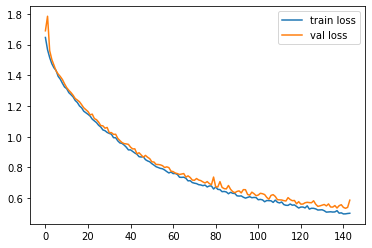

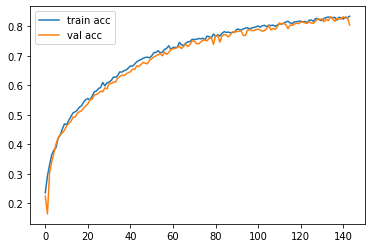

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/LossVal_cassresnet_freezetillblock1_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/AccVal_cassresnet_freezetillblock1_acc')

In [1]:
filepath1="/content/drive/MyDrive/cassava-aug-resnet_freezetillblock1.hdf5"
filepath2="/content/drive/MyDrive/casssava-aug-resnet_freezetillblock1.h5"


model.save(filepath1)
model.save(filepath2)

NameError: ignored

In [2]:
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np


In [3]:
img_size=336
test_datagen = ImageDataGenerator(
   
    rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/cassava_aug_data/test',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

FileNotFoundError: ignored

In [4]:
from tensorflow import keras
filepath1="/content/drive/MyDrive/cassava-aug-resnet_freezetillblock1.hdf5"
model = keras.models.load_model(filepath1)

OSError: ignored

In [5]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [ ]:
target_names = []

for key in train_generator.class_indices:

    target_names.append(key)

In [ ]:
predict = model.predict_generator(valid_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
predict1=model.predict_generator(test_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[209  53  10  17  11]
 [  9 251  12  24   4]
 [  1  18 240  34   7]
 [  2   9  14 271   4]
 [  6  34  22   9 229]]
Confusion matrix, without normalization


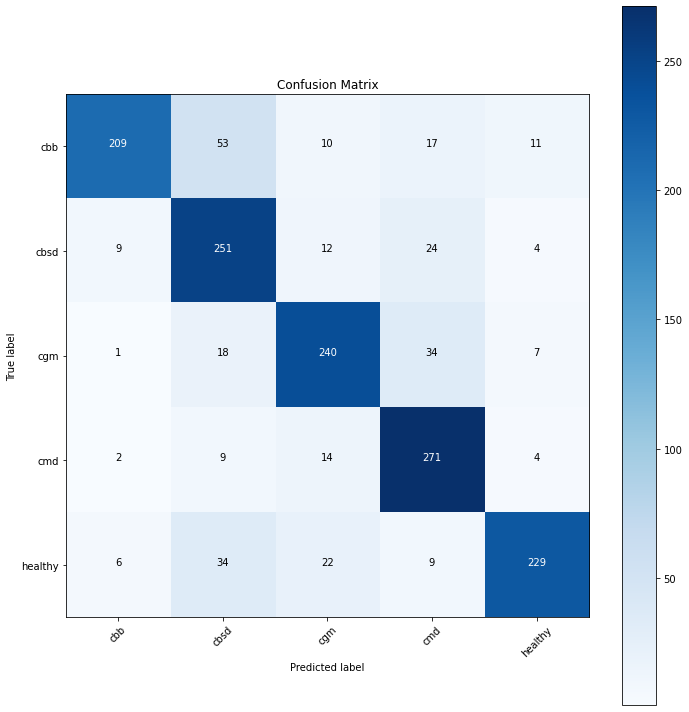

In [ ]:
y_pred = np.argmax(predict, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(valid_generator.classes, y_pred)
print(cm)

import itertools
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')




In [ ]:
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         cbb       0.92      0.70      0.79       300
        cbsd       0.69      0.84      0.75       300
         cgm       0.81      0.80      0.80       300
         cmd       0.76      0.90      0.83       300
     healthy       0.90      0.76      0.83       300

    accuracy                           0.80      1500
   macro avg       0.82      0.80      0.80      1500
weighted avg       0.82      0.80      0.80      1500



Confusion Matrix
[[23 10  3  2  2]
 [ 0 31  0  8  1]
 [ 0  2 35  2  1]
 [ 0  0  0 40  0]
 [ 2  5  0  5 28]]
Confusion matrix, without normalization


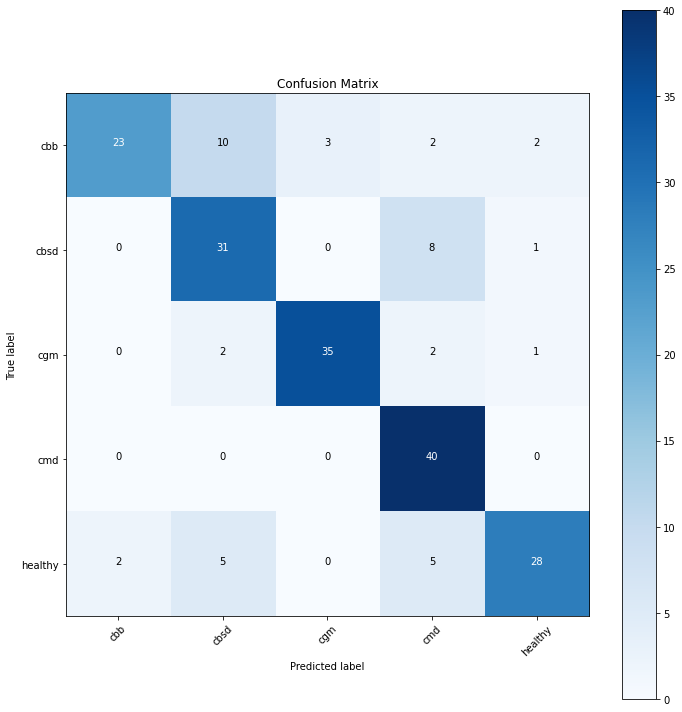

In [ ]:
y_pred = np.argmax(predict1, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)
print(cm)

import itertools
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [ ]:
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         cbb       0.92      0.57      0.71        40
        cbsd       0.65      0.78      0.70        40
         cgm       0.92      0.88      0.90        40
         cmd       0.70      1.00      0.82        40
     healthy       0.88      0.70      0.78        40

    accuracy                           0.79       200
   macro avg       0.81      0.78      0.78       200
weighted avg       0.81      0.79      0.78       200



### **Attention**

In [ ]:
!pip install keras.applications

     |████████████████████████████████| 51kB 7.8MB/s 


In [ ]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.models import Model
from keras.layers.core import Dense, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D
from keras.layers import Input, Dropout
from keras.layers.merge import concatenate, add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras_applications.imagenet_utils import _obtain_input_shape
import keras.backend as K
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras import applications
from keras.applications.resnet50 import ResNet50
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.models import Model
from keras.layers.core import Dense, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D
from keras.layers import Input, Dropout
from keras.layers.merge import concatenate, add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras_applications.imagenet_utils import _obtain_input_shape
import keras.backend as K
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D,Dense, multiply,Conv2D,Lambda,Reshape,Add,Activation,Concatenate
import keras.backend as K
import keras
def CBAM(input, ratio=0.8, kernel_size=7):
  #Determine the channel
  channel =  input.shape[-1]

  #Channel Attention
  #Shared Network
  shared_layer_one = Dense(channel//ratio,
							 activation='relu',
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
  shared_layer_two = Dense(channel,
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
  #GAP
  GAP_feature = GlobalAveragePooling2D()(input)
  GAP_feature = Reshape((1, 1, channel))(GAP_feature)
  GAP_feature = shared_layer_one(GAP_feature)
  GAP_feature = shared_layer_two(GAP_feature)
  #GMP
  max_pool = GlobalMaxPooling2D()(input)
  max_pool = Reshape((1,1,channel))(max_pool)
  max_pool = shared_layer_one(max_pool)
  max_pool = shared_layer_two(max_pool)
  
  cbam_feature = Add()([GAP_feature,max_pool])
  cbam_feature = Activation('sigmoid')(cbam_feature)
  cbam_feature = multiply([input, cbam_feature])
  
  #Spatial Attention
  avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(cbam_feature)
  max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(cbam_feature)
  concat = Concatenate(axis=3)([avg_pool, max_pool])
  cbam_feature1 = Conv2D(filters = 1,
					kernel_size=kernel_size,
					strides=1,
					padding='same',
					activation='sigmoid',
					kernel_initializer='he_normal',
					use_bias=False)(concat)
  cbam_feature = multiply([cbam_feature, cbam_feature1])
  return cbam_feature
  


In [ ]:
import warnings

#from keras.applications.imagenet_utils import _obtain_input_shape
from keras.layers import Input
from keras import layers
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Model
from keras import backend as K
from keras.engine.topology import get_source_inputs
from keras.utils import layer_utils
from keras.utils.data_utils import get_file

WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels.h5'
WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'


def identity_block(input_tensor, kernel_size, filters, stage, block):
    """The identity block is the block that has no conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'keras.., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    """
    filters1, filters2, filters3 = filters
    if K.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size,
               padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    x = layers.add([x, input_tensor])
    x = Activation('relu')(x)
    return x


def conv_block(input_tensor, kernel_size, filters, stage, block, strides=(2, 2)):
    """A block that has a conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'keras.., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    Note that from stage 3, the first conv layer at main path is with strides=(2,2)
    And the shortcut should have strides=(2,2) as well
    """
    filters1, filters2, filters3 = filters
    if K.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), strides=strides,
               name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same',
               name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    x = CBAM(x)

    shortcut = Conv2D(filters3, (1, 1), strides=strides,
                      name=conv_name_base + '1')(input_tensor)
    shortcut = BatchNormalization(axis=bn_axis, name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = Activation('relu')(x)
    return x

In [ ]:
def ResNet50(include_top=True, weights='imagenet',
             input_tensor=None, input_shape=None,
             pooling=None,
             classes=1000):
    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `imagenet` '
                         '(pre-training on ImageNet).')

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` as imagenet with `include_top`'
                         ' as true, `classes` should be 1000')

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor
    if K.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', name='conv1')(img_input)
    x = BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding="same")(x)

    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')

    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')

#     x = AveragePooling2D((7, 7), name='avg_pool')(x)

#     if include_top:
#         x = Flatten()(x)
#         x = Dense(classes, activation='softmax', name='fc1000')(x)
#     else:
#         if pooling == 'avg':
#             x = GlobalAveragePooling2D()(x)
#         elif pooling == 'max':
#             x = GlobalMaxPooling2D()(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = Model(inputs, x, name='resnet50')

    # load weights
    if weights == 'imagenet':
        if include_top:
            weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels.h5',
                                    WEIGHTS_PATH,
                                    cache_subdir='models',
                                    md5_hash='a7b3fe01876f51b976af0dea6bc144eb')
        else:
            weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                    WEIGHTS_PATH_NO_TOP,
                                    cache_subdir='models',
                                    md5_hash='a268eb855778b3df3c7506639542a6af')
        model.load_weights(weights_path,by_name=True)
    return model

In [ ]:
 #resnet_base = ResNet50(input_shape=(256,256,3), include_top=False)
 resnet_base = ResNet50(input_shape=(336,336,3), include_top=False)

94658560/94653016 [==============================] - 1s 0us/step


In [ ]:
resnet_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 336, 336, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 168, 168, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 168, 168, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, 168, 168, 64) 0           bn_conv1[0][0]                   
___________________________________________________________________________________________

In [ ]:
x = resnet_base.output
x = GlobalAveragePooling2D()(x)
output = Dense(5,activation='softmax')(x)

model = Model(inputs=resnet_base.input,outputs=output)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 336, 336, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 168, 168, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 168, 168, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, 168, 168, 64) 0           bn_conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
img_size=336
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.0,
    width_shift_range=0.2,
    height_shift_range=0.2)

valid_datagen = ImageDataGenerator(
    rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/cassava_aug_data/train',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/cassava_aug_data/val',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)

Found 6000 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


In [ ]:
from keras.optimizers import Adam,SGD
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint


model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr = 1e-5,momentum=0.9),
              metrics = ['accuracy'])

early_stop = EarlyStopping(
     monitor='val_loss',
     patience=10,
     verbose=1,
     restore_best_weights=False)

filepath1="/content/drive/MyDrive/cassava_attention_ResNet.hdf5"

filepath2="/content/drive/MyDrive/cassava_attention_ResNet.h5"

checkpoint = ModelCheckpoint(
     filepath1,
     monitor='val_acc',
     verbose=1,
     save_best_only=True,
     mode='max',
     period = 5)

In [ ]:
history = model.fit(train_generator,
                   validation_steps = valid_generator.n // valid_generator.batch_size,
                   validation_data = valid_generator,
                   steps_per_epoch = train_generator.n // train_generator.batch_size ,
                   epochs = 144,
                   callbacks = [checkpoint])

model.save(filepath1)
model.save(filepath2)


import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Resnet_Atten_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Resnet_Atten_acc')


Epoch 1/144
187/187 [==============================] - 1923s 10s/step - loss: 1.6758 - accuracy: 0.2085 - val_loss: 2.7651 - val_accuracy: 0.2038
Epoch 2/144
187/187 [==============================] - 241s 1s/step - loss: 1.5954 - accuracy: 0.2800 - val_loss: 5.0392 - val_accuracy: 0.2038
Epoch 3/144
187/187 [==============================] - 241s 1s/step - loss: 1.5464 - accuracy: 0.3100 - val_loss: 2.3400 - val_accuracy: 0.1916
Epoch 4/144
187/187 [==============================] - 241s 1s/step - loss: 1.4900 - accuracy: 0.3519 - val_loss: 1.6751 - val_accuracy: 0.2439
Epoch 5/144
187/187 [==============================] - 241s 1s/step - loss: 1.4386 - accuracy: 0.4110 - val_loss: 1.4827 - val_accuracy: 0.3587
Epoch 6/144
187/187 [==============================] - 241s 1s/step - loss: 1.4006 - accuracy: 0.4326 - val_loss: 1.3753 - val_accuracy: 0.4538
Epoch 7/144
187/187 [==============================] - 241s 1s/step - loss: 1.3766 - accuracy: 0.4503 - val_loss: 1.3182 - val_accurac

In [ ]:
from tensorflow import keras
classifier = keras.models.load_model("/content/drive/MyDrive/casssava-aug-resnet.h5")

In [ ]:
class_dict = train_generator.class_indices
print(class_dict)
li = list(class_dict.keys())
print(li)

{'cbb': 0, 'cbsd': 1, 'cgm': 2, 'cmd': 3, 'healthy': 4}
['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']


Following is our prediction:


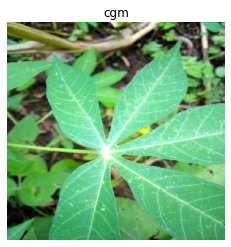

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
image_path = "/content/drive/MyDrive/cassava_aug_data/test/test_cgm/173849826.jpg"
new_img = image.load_img(image_path, target_size=(336, 336))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

     
        
##Another way
#img_class = classifier.predict_classes(img)
#img_prob = classifier.predict_proba(img)
#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()